# Machine Learning Foundation

### Setup

Using the Ames Housing Data:

Dean De Cock
Truman State University
Journal of Statistics Education Volume 19, Number 3(2011), www.amstat.org/publications/jse/v19n3/decock.pdf

In this notebook, we will build some linear regression models to predict housing prices from this data. In particular, we will set out to improve on a baseline set of features via **feature engineering**: deriving new features from our existing data. Feature engineering often makes the difference between a weak model and a strong one.

We will use visual exploration, domain understanding, and intuition to construct new features that will be useful later in the course as we turn to prediction.

**Notebook Contents**

> 1. Simple EDA 
> 2. One-hot Encoding variables
> 3. Log transformation for skewed variables
> 4. Pair plot for features
> 5. Basic feature engineering: adding polynomial and interaction terms
> 6. Feature engineering: categories and features derived from category aggregates 


In [ ]:
# Surpress warnings:
# def warn(*args, **kwargs):
#     pass
# import warnings
# warnings.warn = warn

In [88]:
# %pylab inline
# %config InlineBackend.figure_formats = ['retina']
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

#### Load the Data, Examine and Explore


In [ ]:
## Load in the Ames Housing Data

# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data.tsv", sep='\t')

In [45]:
filename = "data/Ames_Housing_Data1.tsv"
df = pd.read_csv(filename, sep='\t')

In [10]:
## Examine the columns, look at missing data
df.shape

(2931, 82)

In [21]:
df.columns[:10] 

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour'],
      dtype='object')

In [22]:
df.isnull().sum().sort_values(ascending=False).head(10)

Pool QC          2918
Misc Feature     2825
Alley            2733
Fence            2359
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Cond       159
Garage Finish     159
Garage Yr Blt     159
dtype: int64

In [23]:
df.dtypes.iloc[:10]

Order             int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
Lot Area          int64
Street           object
Alley            object
Lot Shape        object
Land Contour     object
dtype: object

In [24]:
df.dtypes.value_counts()

object     43
int64      28
float64    11
Name: count, dtype: int64

In [ ]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df['Gr Liv Area'] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy() # Keep a copy our original data 

In [ ]:
# A quick look at the data:
df.head()

### One-hot encoding for dummy variables:

We're going to first do some basic data cleaning on this data: 

* Converting categorical variables to dummies
* Making skew variables symmetric

In [30]:
df.dtypes.value_counts()

object     43
int64      28
float64    11
Name: count, dtype: int64

In [31]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = df.dtypes[df.dtypes == 'object']  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields

In [32]:
len(one_hot_encode_cols)

43

In [33]:
one_hot_encode_cols[:5] 

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour']

We're going to first do some basic data cleaning on this data: 

* Converting categorical variables to dummies
* Making skew variables symmetric

#### One-hot encoding the dummy variables:


In [44]:
one_hot_encode_cols[:5] 

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour']

In [62]:
df['Lot Shape'].value_counts()

Lot Shape
Reg    1859
IR1     980
IR2      76
IR3      16
Name: count, dtype: int64

In [50]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [46]:
# Do the one hot encoding
df_one_hot = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)

In [48]:
df.shape, df_one_hot.shape

((2931, 82), (2931, 263))

In [63]:
lot_shape = list(filter(lambda x: 'Lot Shape' in x, df_one_hot.columns.tolist()))

In [64]:
lot_shape

['Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg']

In [68]:
df['Lot Shape'].head(20)

0     IR1
1     IR1
2     Reg
3     IR1
4     Reg
5     IR1
6     IR1
7     Reg
8     IR1
9     IR1
10    Reg
11    IR1
12    IR1
13    IR1
14    Reg
15    IR1
16    IR2
17    IR1
18    Reg
19    Reg
Name: Lot Shape, dtype: object

In [69]:
df_one_hot[lot_shape].head(20)

,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg
0,False,False,False
1,False,False,False
2,False,False,True
3,False,False,False
4,False,False,True
5,False,False,False
6,False,False,False
7,False,False,True
8,False,False,False
9,False,False,False


#### DEBUGGING

In [36]:
# Create sample data
dfe = pd.DataFrame({
    'color': ['red', 'blue', 'red', 'green']
})
dfe

,color
0,red
1,blue
2,red
3,green


In [37]:
# Without drop_first
print("All dummy variables:")
pd.get_dummies(dfe, columns=['color'])

All dummy variables:


,color_blue,color_green,color_red
0,False,False,True
1,True,False,False
2,False,False,True
3,False,True,False


In [38]:
# With drop_first=True
print("\nDropping first category:")
pd.get_dummies(dfe, columns=['color'], drop_first=True)


Dropping first category:


,color_green,color_red
0,False,True
1,False,False
2,False,True
3,True,False


### Log transforming skew variables


In [75]:
df.dtypes.value_counts()

object     43
int64      28
float64    11
Name: count, dtype: int64

In [72]:
mask = df.dtypes == 'float'

In [73]:
float_cols = df.columns[mask]

In [74]:
float_cols.shape

(11,)

In [76]:
float_cols

Index(['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area'],
      dtype='object')

In [77]:
df[float_cols].dtypes

Lot Frontage      float64
Mas Vnr Area      float64
BsmtFin SF 1      float64
BsmtFin SF 2      float64
Bsmt Unf SF       float64
Total Bsmt SF     float64
Bsmt Full Bath    float64
Bsmt Half Bath    float64
Garage Yr Blt     float64
Garage Cars       float64
Garage Area       float64
dtype: object

In [78]:
skew_limit = 0.75 # define a limit above which we will log transform

In [80]:
skew_vals = df[float_cols].skew()

In [82]:
type(skew_vals)

pandas.core.series.Series

In [83]:
skew_vals

Lot Frontage      1.498775
Mas Vnr Area      2.607370
BsmtFin SF 1      1.415875
BsmtFin SF 2      4.140794
Bsmt Unf SF       0.923445
Total Bsmt SF     1.156333
Bsmt Full Bath    0.615698
Bsmt Half Bath    3.941592
Garage Yr Blt    -0.383996
Garage Cars      -0.220168
Garage Area       0.241770
dtype: float64

In [84]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

In [85]:
skew_cols

,Skew
BsmtFin SF 2,4.140794
Bsmt Half Bath,3.941592
Mas Vnr Area,2.607370
Lot Frontage,1.498775
BsmtFin SF 1,1.415875
Total Bsmt SF,1.156333
Bsmt Unf SF,0.923445


In [87]:
skew_vals[skew_vals > skew_limit].sort_values(ascending=False)

BsmtFin SF 2      4.140794
Bsmt Half Bath    3.941592
Mas Vnr Area      2.607370
Lot Frontage      1.498775
BsmtFin SF 1      1.415875
Total Bsmt SF     1.156333
Bsmt Unf SF       0.923445
dtype: float64

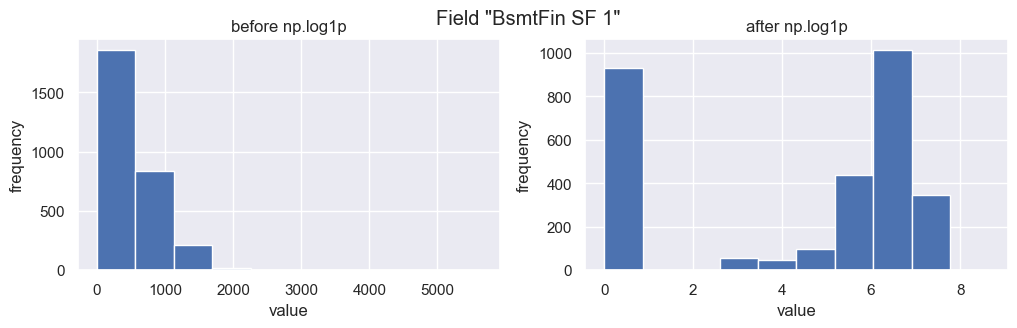

In [90]:
# Let's look at what happens to one of these features, when we apply np.log1p visually.

# Choose a field
field = "BsmtFin SF 1"

# Create two "subplots" and a "figure" using matplotlib
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(12, 3))

# Create a histogram on the "ax_before" subplot
df[field].hist(ax=ax_before)

# Apply a log transformation (numpy syntax) to this column
df[field].apply(np.log1p).hist(ax=ax_after)

# Formatting of titles etc. for each subplot
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [91]:
# Perform the skew transformation:

for col in skew_cols.index.values:
    if col == "SalePrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [92]:
# We now have a larger set of potentially-useful features
df.shape

(2931, 82)

In [96]:
# There are a *lot* of variables. Let's go back to our saved original data and look at how many values are missing for each variable. 
df.isnull().sum().sort_values(ascending=False).head(10)

Pool QC          2918
Misc Feature     2825
Alley            2733
Fence            2359
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Cond       159
Garage Finish     159
Garage Yr Blt     159
dtype: int64

 Let's pick out just a few numeric columns to illustrate basic feature transformations.


In [97]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars','SalePrice']]

In [99]:
# Now we can look at summary statistics of the subset data
smaller_df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Lot Area,2931.0,10155.30,7888.79,1300.0,7440.5,9439.0,11556.0,215245.0
Overall Qual,2931.0,6.09,1.41,1.0,5.0,6.0,7.0,10.0
Overall Cond,2931.0,5.56,1.11,1.0,5.0,5.0,6.0,9.0
Year Built,2931.0,1971.35,30.24,1872.0,1954.0,1973.0,2001.0,2010.0
Year Remod/Add,2931.0,1984.26,20.86,1950.0,1965.0,1993.0,2004.0,2010.0
Gr Liv Area,2931.0,1499.74,505.43,334.0,1126.0,1442.0,1742.5,5642.0
Full Bath,2931.0,1.57,0.55,0.0,1.0,2.0,2.0,4.0
Bedroom AbvGr,2931.0,2.85,0.83,0.0,2.0,3.0,3.0,8.0
Fireplaces,2931.0,0.60,0.65,0.0,0.0,1.0,1.0,4.0
Garage Cars,2930.0,1.77,0.76,0.0,1.0,2.0,2.0,5.0


In [100]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2931 non-null   int64  
 1   Overall Qual    2931 non-null   int64  
 2   Overall Cond    2931 non-null   int64  
 3   Year Built      2931 non-null   int64  
 4   Year Remod/Add  2931 non-null   int64  
 5   Gr Liv Area     2931 non-null   int64  
 6   Full Bath       2931 non-null   int64  
 7   Bedroom AbvGr   2931 non-null   int64  
 8   Fireplaces      2931 non-null   int64  
 9   Garage Cars     2930 non-null   float64
 10  SalePrice       2931 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 252.0 KB


In [101]:
# There appears to be one NA in Garage Cars - we will take a simple approach and fill it with 0
smaller_df = smaller_df.fillna(0)

In [102]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2931 non-null   int64  
 1   Overall Qual    2931 non-null   int64  
 2   Overall Cond    2931 non-null   int64  
 3   Year Built      2931 non-null   int64  
 4   Year Remod/Add  2931 non-null   int64  
 5   Gr Liv Area     2931 non-null   int64  
 6   Full Bath       2931 non-null   int64  
 7   Bedroom AbvGr   2931 non-null   int64  
 8   Fireplaces      2931 non-null   int64  
 9   Garage Cars     2931 non-null   float64
 10  SalePrice       2931 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 252.0 KB



### Pair plot of features
Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships: pairplot is great for this!


In [ ]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor='none'))

---
**Data Exploration Discussion**: 

1. What do these plots tell us about the distribution of the target?   

2. What do these plots tell us about the relationship between the features and the target? Do you think that linear regression is well-suited to this problem? Do any feature transformations come to mind?

3. What do these plots tell us about the relationship between various pairs of features? Do you think there may be any problems here? 

---


#### Suppose our target variable is the SalePrice. We can set up separate variables for features and target.


In [104]:
#Separate our features from our target

X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond', 
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area', 
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces', 
                      'Garage Cars']]

y = smaller_df['SalePrice']

In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2931 non-null   int64  
 1   Overall Qual    2931 non-null   int64  
 2   Overall Cond    2931 non-null   int64  
 3   Year Built      2931 non-null   int64  
 4   Year Remod/Add  2931 non-null   int64  
 5   Gr Liv Area     2931 non-null   int64  
 6   Full Bath       2931 non-null   int64  
 7   Bedroom AbvGr   2931 non-null   int64  
 8   Fireplaces      2931 non-null   int64  
 9   Garage Cars     2931 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 229.1 KB


Now that we have feature/target data X, y ready to go, we're nearly ready to fit and evaluate a baseline model using our current feature set. We'll need to create a **train/validation split** before we fit and score the model. 

Since we'll be repeatedly splitting X, y into the same train/val partitions and fitting/scoring new models as we update our feature set, we'll define a reusable function that completes all these steps, making our code/process more efficient going forward. 


Great, let's go ahead and run this function on our baseline feature set and take some time to analyze the results.


### Basic feature engineering: adding polynomial and interaction terms


One of the first things that we looked for in the pairplot was evidence about the relationship between each feature and the target. In certain features like _'Overall Qual'_ and _'Gr Liv Qual'_, we notice an upward-curved relationship rather than a simple linear correspondence. This suggests that we should add quadratic **polynomial terms or transformations** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

Luckily, pandas makes it quite easy to quickly add those square terms as additional features to our original feature set. We'll do so and evaluate our model again below.

As we add to our baseline set of features, we'll create a copy of the latest benchmark so that we can continue to store our older feature sets. 



### Polynomial Features

In [106]:
X2 = X.copy()

X2['OQ2'] = X2['Overall Qual'] ** 2
X2['GLA2'] = X2['Gr Liv Area'] ** 2


As is, each feature is treated as an independent quantity. However, there may be **interaction effects**, in which the impact of one feature may dependent on the current value of a different feature.

For example, there may be a higher premium for increasing _'Overall Qual'_ for houses that were built more recently. If such a premium or a similar effect exists, a feature that multiplies _'Overall Qual'_ by _'Year Built'_ can help us capture it.

Another style of interaction term involves feature proprtions: for example, to get at something like quality per square foot we could divide _'Overall Qual'_ by _'Lot Area'_.

Let's try adding both of these interaction terms and see how they impact the model results.




### Feature interactions

In [107]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']



-----
**Interaction Feature Exercise**: What other interactions do you think might be helpful? Why? 

-----


### Categories and features derived from category aggregates 


Incorporating **categorical features** into linear regression models is fairly straightforward: we can create a new feature column for each category value, and fill these columns with 1s and 0s to indicate which category is present for each row. This method is called **dummy variables** or **one-hot-encoding**.

We'll first explore this using the _'House Style'_ feature from the original dataframe. Before going straight to dummy variables, it's a good idea to check category counts to make sure all categories have reasonable representation.


In [108]:
df['House Style'].value_counts()

House Style
1Story    1482
2Story     873
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: count, dtype: int64

This looks ok, and here's a quick look at how dummy features actually appear:


In [109]:
pd.get_dummies(df['House Style'], drop_first=True).head()

,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,False,True,False,False,False,False,False
1,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False
4,False,True,False,False,False,False,False


We can call `pd.get_dummies()` on our entire dataset to quickly get data with all the original features and dummy variable representation of any categorical features. Let's look at some variable values.


In [111]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts.head()

Neighborhood
NAmes      444
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
Name: count, dtype: int64

For this category, let's map the few least-represented neighborhoods to an "other" category before adding the feature to our feature set and running a new benchmark.


In [112]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [113]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')


#### Getting to fancier features

Let's close out our introduction to feature engineering by considering a more complex type of feature that may work very nicely for certain problems. It doesn't seem to add a great deal over what we have so far, but it's a style of engineering to keep in mind for the future.

We'll create features that capture where a feature value lies relative to the members of a category it belongs to. In particular, we'll calculate deviance of a row's feature value from the mean value of the category that row belongs to. This helps to capture information about a feature relative to the category's distribution, e.g. how nice a house is relative to other houses in its neighborhood or of its style.

Below we define reusable code for generating features of this form, feel free to repurpose it for future feature engineering work!


In [114]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

And now let's use our feature generation code to add 2 new deviation features, and run a final benchmark.


In [115]:
X5 = X4.copy()
X5['House Style'] = df['House Style']
add_deviation_feature(X5, 'Year Built', 'House Style')
add_deviation_feature(X5, 'Overall Qual', 'Neighborhood')


### Polynomial Features in Scikit-Learn

`sklearn` allows you to build many higher-order terms at once with `PolynomialFeatures`


In [116]:
from sklearn.preprocessing import PolynomialFeatures

In [117]:
#Instantiate and provide desired degree; 
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms

pf = PolynomialFeatures(degree=2)

In [118]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()

In [121]:
pf.get_feature_names_out()

array(['1', 'Lot Area', 'Overall Qual', 'Lot Area^2',
       'Lot Area Overall Qual', 'Overall Qual^2'], dtype=object)

In [122]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns = pf.get_feature_names_out(input_features=features))

,1,Lot Area,Overall Qual,Lot Area^2,Lot Area Overall Qual,Overall Qual^2
0,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
1,1.0,31770.0,6.0,1.009333e+09,190620.0,36.0
2,1.0,11622.0,5.0,1.350709e+08,58110.0,25.0
3,1.0,14267.0,6.0,2.035473e+08,85602.0,36.0
4,1.0,11160.0,7.0,1.245456e+08,78120.0,49.0
...,...,...,...,...,...,...
2926,1.0,7937.0,6.0,6.299597e+07,47622.0,36.0
2927,1.0,8885.0,5.0,7.894322e+07,44425.0,25.0
2928,1.0,10441.0,5.0,1.090145e+08,52205.0,25.0
2929,1.0,10010.0,5.0,1.002001e+08,50050.0,25.0
